In [10]:
import cse
import matplotlib.pyplot as plt
import numpy as np

ev2Ha = 3.67493e-2
cm2Ha = 4.55634e-6
cm2MHz = 2.99792e4
ev2cm = 8065.541
ev2MHz = 2.41799e8
aBohr = 0.52917721067

sr2 = cse.Cse('84Sr', VT=['../potentials/srGS.dat'])

sr2.VT = (sr2.VT - sr2.VT.min())/ev2cm

In [11]:
# 86 - 61 - 0.134104682938705 - d=0.01 - rInf=1000 A
# 86 - 61 - 0.134104693906399 - d=0.005 - rInf=1000 A
# 86 - 61 - 0.134104693906909 - d=0.005 - rInf=1000 A
# 86 - 61 - 0.134104694611904 - d=0.002 - rInf=200 A
# 86 - 61 - 0.134104694629240 - d=0.001 - rInf=200 A

# 86 - 62 - 0.134106053429147 - d=0.005 - rInk=1000 A

#V(r=100) = 0.134105430651553

sr2.solve(sr2.VT[0,0,-1] - 0.3/ev2MHz)
wf1 = sr2.wavefunction[:, 0]
en1 = sr2.energy

#sr2.solve(sr2.VT[0,0,-1] - 13*1/ev2MHz)
#wf2 = sr2.wavefunction[:, 0]
#en2 = sr2.energy

sr2


Molecule: 84Sr  mass: 6.96708e-26 kg, 41.9567 amu
Electronic state: ../potentials/srGS.dat

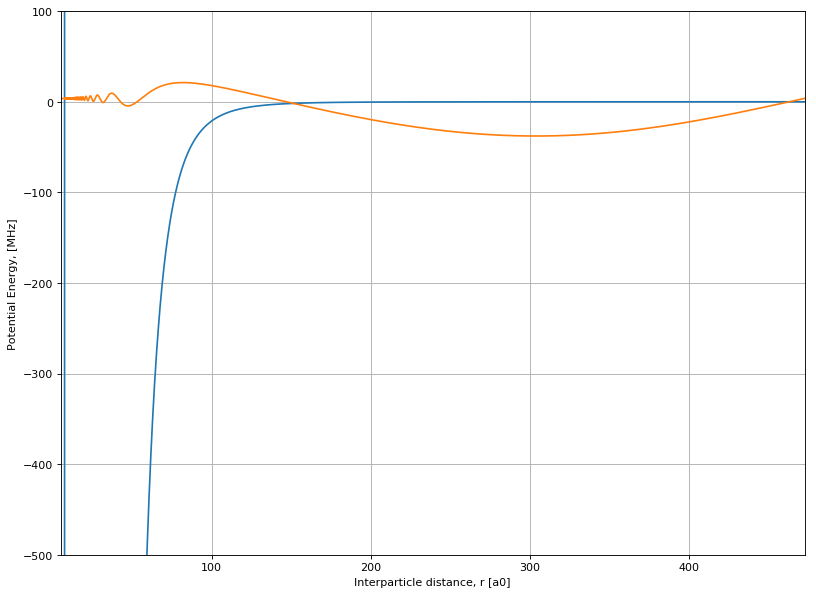

In [12]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

# Potential to plots
V = (sr2.VT[0, 0] - sr2.VT[0, 0, -1])*ev2MHz
R = sr2.R/aBohr

# Wavefunction to plot
A = 400 # arbitrary amplitude factor for visualization
wf_1 = -A*sr2.wavefunction[:, 0] + (en1 - sr2.VT[0, 0, -1])*ev2MHz

plt.plot(R, V)
plt.plot(R, wf_1)

plt.axis(xmin=5, xmax=250/aBohr, ymin=-500, ymax=100)
plt.xlabel('Interparticle distance, r [a0]')
plt.ylabel('Potential Energy, [MHz]')
#plt.xscale('log')
plt.grid(1)
plt.show()

In [ ]:
sr2.levels(vmax=62, ntrial=1)

In [33]:
(sr2.VT[0,0,-1] - sr2.energy)*2.41799*10**8

328.80256944415606

In [8]:
sr2.results

OrderedDict([(62, (1081.6311614296585, 3.985240093497974e-05, nan, 0))])

In [6]:
(sr2.VT[0,0,-1] - sr2.energy)*ev2MHz

13.651793216909208

In [24]:
sr2.R[2937]*aBohr

8.829321760028783

In [29]:
data = np.column_stack((sr2.R, -1*sr2.wavefunction[:, 0]))
np.savetxt("../data/86sr2_halo.dat", data)

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#default value is "last_expr"